In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Library**

imports necessary libraries such as numpy, pandas, seaborn, etc. for data manipulation, visualization, statistical analysis, and machine learning.

In [2]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import scipy
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, ttest_ind
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

**Understanding the dataset**

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Weather_forecasting/Kolkata_weather_data_2017-2022_.csv')
#df=pd.read_csv('/content/Kolkata_weather_data(2017-2022).csv')

In [4]:
df

,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Info,Conditions
0,"Kolkata,West Bengal,India",01/01/2017,14.0,25.3,19.9,16.5,82.47,NaN,5.8,NaN,...,1.2,4.9,1015.9,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
1,"Kolkata,West Bengal,India",01/02/2017,16.0,26.0,20.6,16.0,76.76,NaN,8.1,NaN,...,1.4,0.3,1015.6,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
2,"Kolkata,West Bengal,India",01/03/2017,16.0,27.0,21.1,15.6,73.12,27.3,9.2,NaN,...,1.6,10.7,1014.7,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
3,"Kolkata,West Bengal,India",01/04/2017,16.0,25.0,19.9,14.5,72.57,NaN,8.1,NaN,...,1.8,2.3,1014.6,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
4,"Kolkata,West Bengal,India",01/05/2017,15.0,25.6,19.6,13.7,71.88,NaN,8.1,NaN,...,1.9,0.0,1013.7,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,"Kolkata,West Bengal,India",12/27/2022,21.8,30.0,24.9,21.0,80.08,32.0,10.3,NaN,...,1.4,33.4,1013.7,"Mist, Sky Coverage Increasing, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Partially cloudy
2187,"Kolkata,West Bengal,India",12/28/2022,18.3,27.0,22.7,18.1,76.56,27.7,9.2,NaN,...,1.1,9.1,1015.1,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
2188,"Kolkata,West Bengal,India",12/29/2022,15.0,26.0,20.0,11.5,60.60,NaN,6.9,NaN,...,1.5,6.1,1017.0,"Mist, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
2189,"Kolkata,West Bengal,India",12/30/2022,14.9,26.0,20.2,13.6,67.41,NaN,5.8,NaN,...,1.3,5.5,1017.5,"Mist, Fog, Smoke Or Haze",22.5705,88.3713,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear


In [5]:
print(f"Dataset Shape: {df.shape}")
print("\nData Types:\n", df.dtypes)


Dataset Shape: (2191, 25)

Data Types:
 Address                 object
Date time               object
Minimum Temperature    float64
Maximum Temperature    float64
Temperature            float64
Dew Point              float64
Relative Humidity      float64
Heat Index             float64
Wind Speed             float64
Wind Gust              float64
Wind Direction         float64
Wind Chill             float64
Precipitation          float64
Precipitation Cover    float64
Snow Depth             float64
Visibility             float64
Cloud Cover            float64
Sea Level Pressure     float64
Weather Type            object
Latitude               float64
Longitude              float64
Resolved Address        object
Name                    object
Info                   float64
Conditions              object
dtype: object


In [6]:
df.columns

Index(['Address', 'Date time', 'Minimum Temperature', 'Maximum Temperature',
       'Temperature', 'Dew Point', 'Relative Humidity', 'Heat Index',
       'Wind Speed', 'Wind Gust', 'Wind Direction', 'Wind Chill',
       'Precipitation', 'Precipitation Cover', 'Snow Depth', 'Visibility',
       'Cloud Cover', 'Sea Level Pressure', 'Weather Type', 'Latitude',
       'Longitude', 'Resolved Address', 'Name', 'Info', 'Conditions'],
      dtype='object')

In [7]:
df = df[['Date time', 'Minimum Temperature', 'Maximum Temperature',
       'Temperature','Wind Speed','Precipitation','Weather Type',
       'Wind Direction', 'Conditions']]

In [8]:
df.rename(columns={"Conditions": "Weather"}, inplace=True)
df.columns


<ipython-input-8-3ae5495eae9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"Conditions": "Weather"}, inplace=True)


Index(['Date time', 'Minimum Temperature', 'Maximum Temperature',
       'Temperature', 'Wind Speed', 'Precipitation', 'Weather Type',
       'Wind Direction', 'Weather'],
      dtype='object')

In [9]:
df.head()

,Date time,Minimum Temperature,Maximum Temperature,Temperature,Wind Speed,Precipitation,Weather Type,Wind Direction,Weather
0,01/01/2017,14.0,25.3,19.9,5.8,0.0,"Mist, Fog, Smoke Or Haze",78.33,Clear
1,01/02/2017,16.0,26.0,20.6,8.1,0.0,"Mist, Fog, Smoke Or Haze",148.54,Clear
2,01/03/2017,16.0,27.0,21.1,9.2,0.0,"Mist, Smoke Or Haze",244.92,Clear
3,01/04/2017,16.0,25.0,19.9,8.1,0.0,"Mist, Smoke Or Haze",244.38,Clear
4,01/05/2017,15.0,25.6,19.6,8.1,0.0,"Mist, Smoke Or Haze",231.58,Clear


In [10]:
df.shape

(2191, 9)

In [11]:
df.describe()

,Minimum Temperature,Maximum Temperature,Temperature,Wind Speed,Precipitation,Wind Direction
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,22.736604,31.397490,26.677088,11.272980,4.492268,154.037335
std,5.228905,4.135988,4.415869,6.163396,13.268362,52.448529
min,9.000000,18.000000,14.200000,3.400000,0.000000,20.950000
25%,19.000000,29.000000,23.600000,8.100000,0.000000,115.960000
50%,25.000000,32.000000,28.300000,10.300000,0.000000,156.130000
75%,27.000000,34.600000,30.000000,13.900000,1.675000,191.020000
max,30.500000,41.000000,34.800000,123.300000,232.770000,331.380000


In [12]:
df['Weather'].unique()

array(['Clear', 'Partially cloudy', 'Rain, Partially cloudy', 'Rain',
       'Rain, Overcast', 'Overcast'], dtype=object)

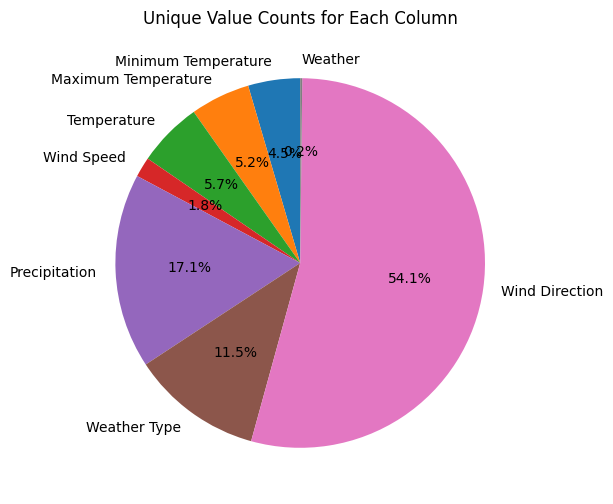

In [13]:

columns = ['Minimum Temperature', 'Maximum Temperature', 'Temperature',
           'Wind Speed', 'Precipitation', 'Weather Type',
           'Wind Direction', 'Weather']

unique_counts = [len(df[col].unique()) for col in columns]

plt.figure(figsize=(10, 6))
plt.pie(unique_counts, labels=columns, autopct='%1.1f%%', startangle=90)
plt.title('Unique Value Counts for Each Column')
plt.show()


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

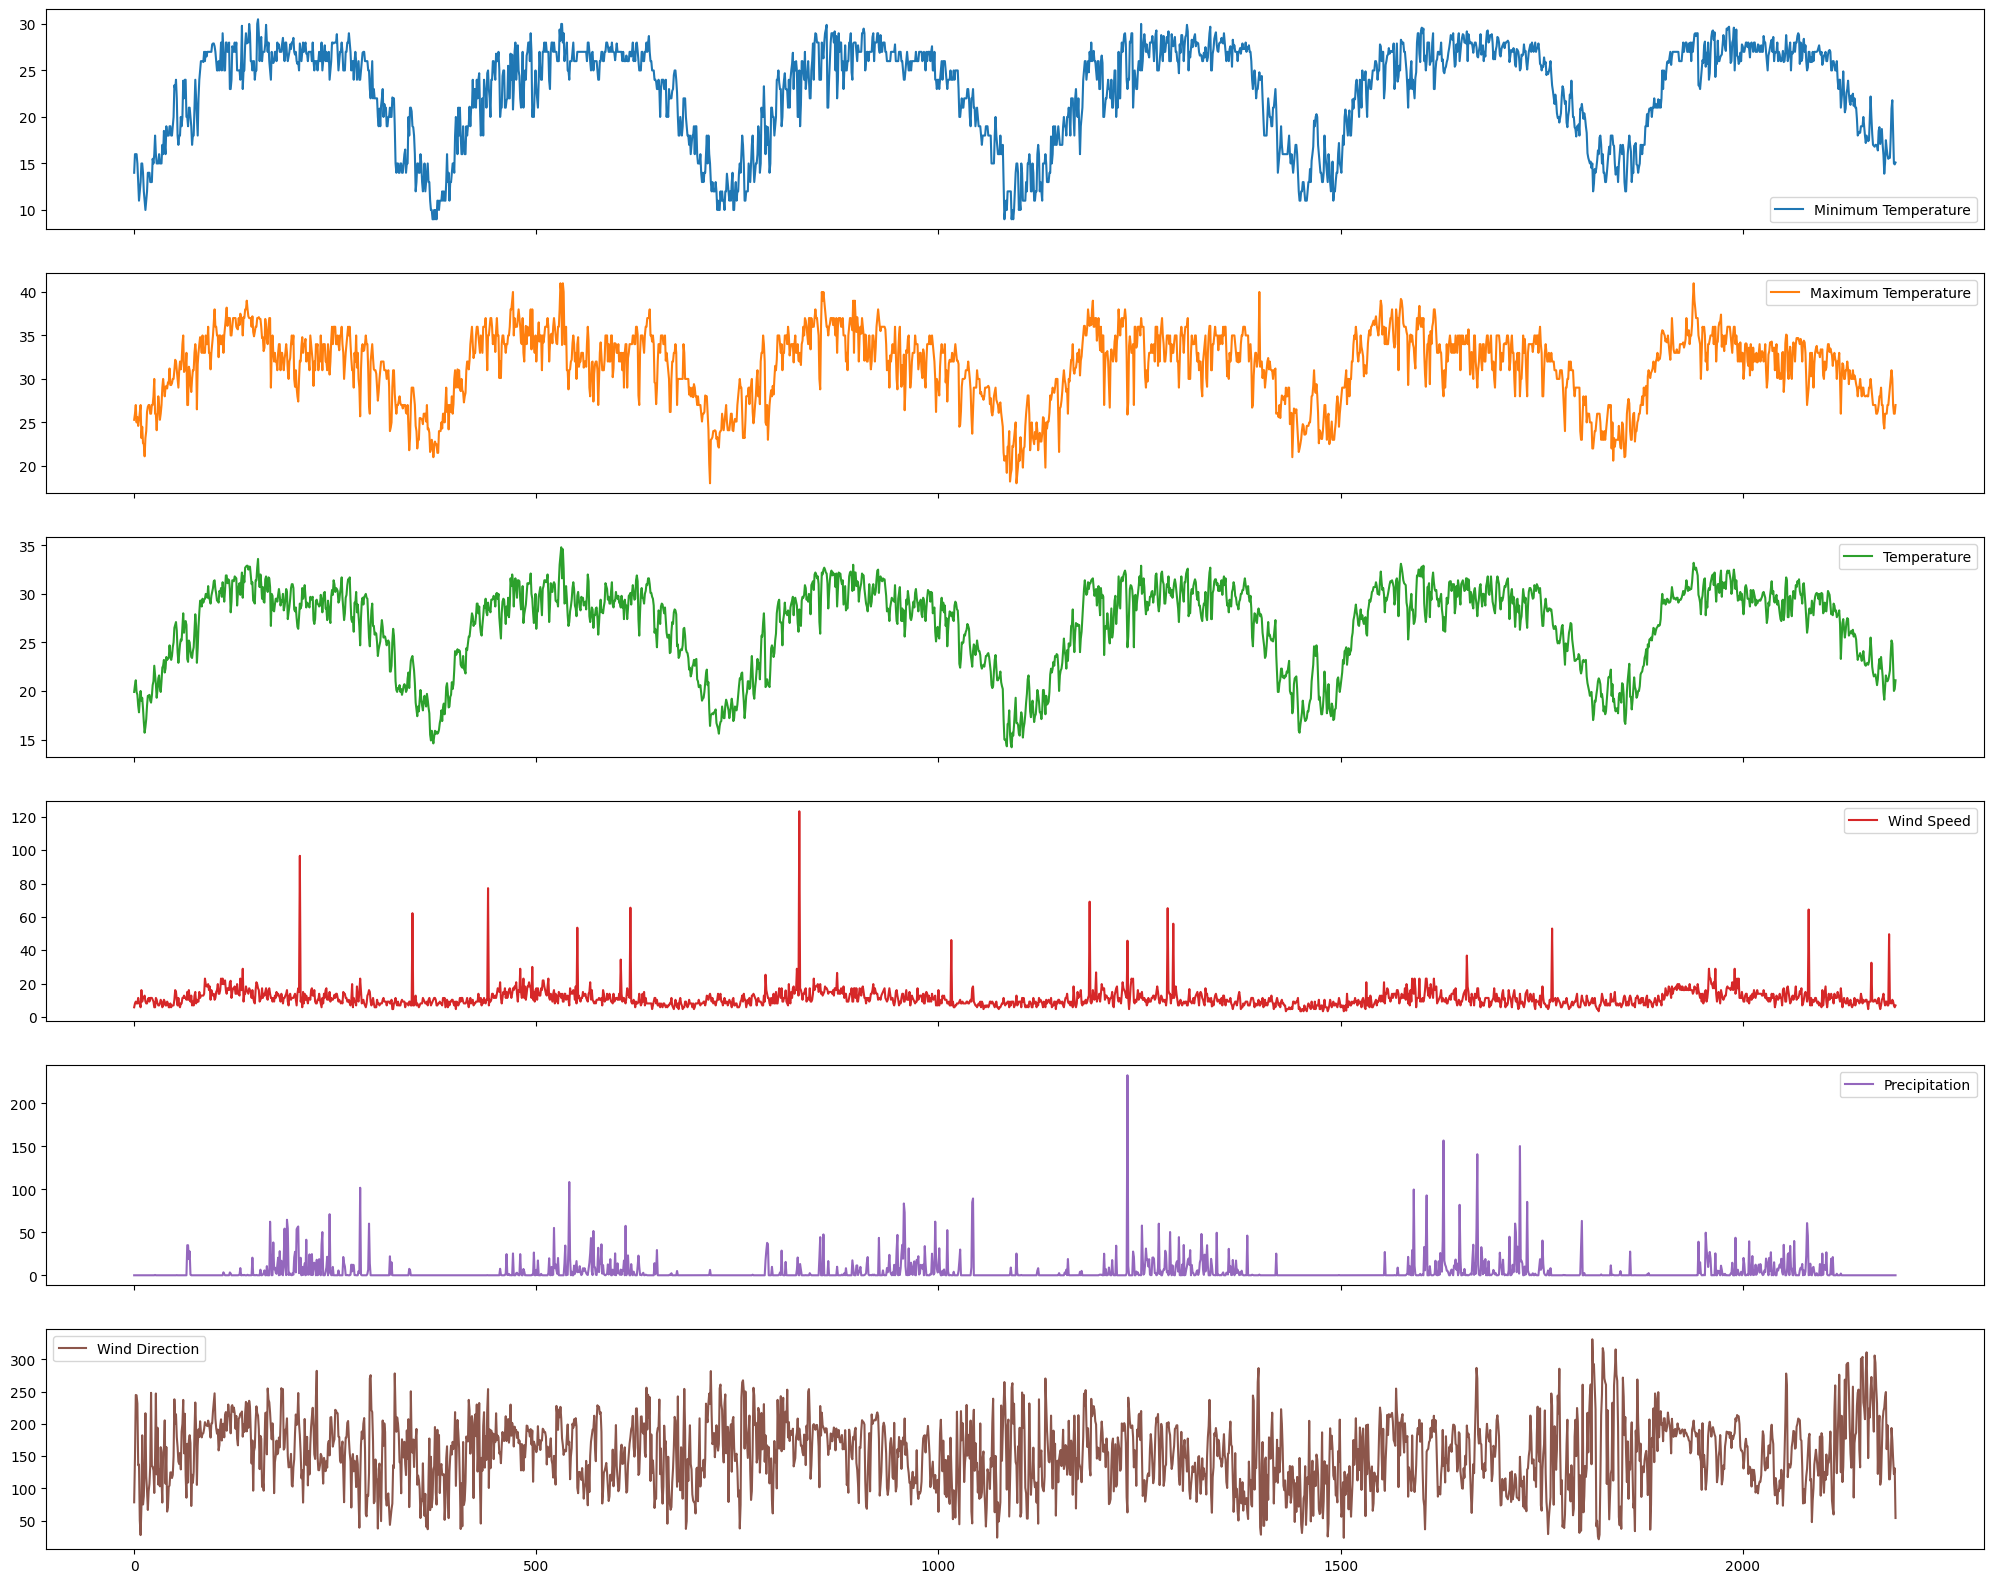

In [14]:
df.plot(subplots=True, figsize=(25,20))

array([[<Axes: title={'center': 'Minimum Temperature'}>,
        <Axes: title={'center': 'Maximum Temperature'}>],
       [<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Wind Speed'}>],
       [<Axes: title={'center': 'Precipitation'}>,
        <Axes: title={'center': 'Wind Direction'}>]], dtype=object)

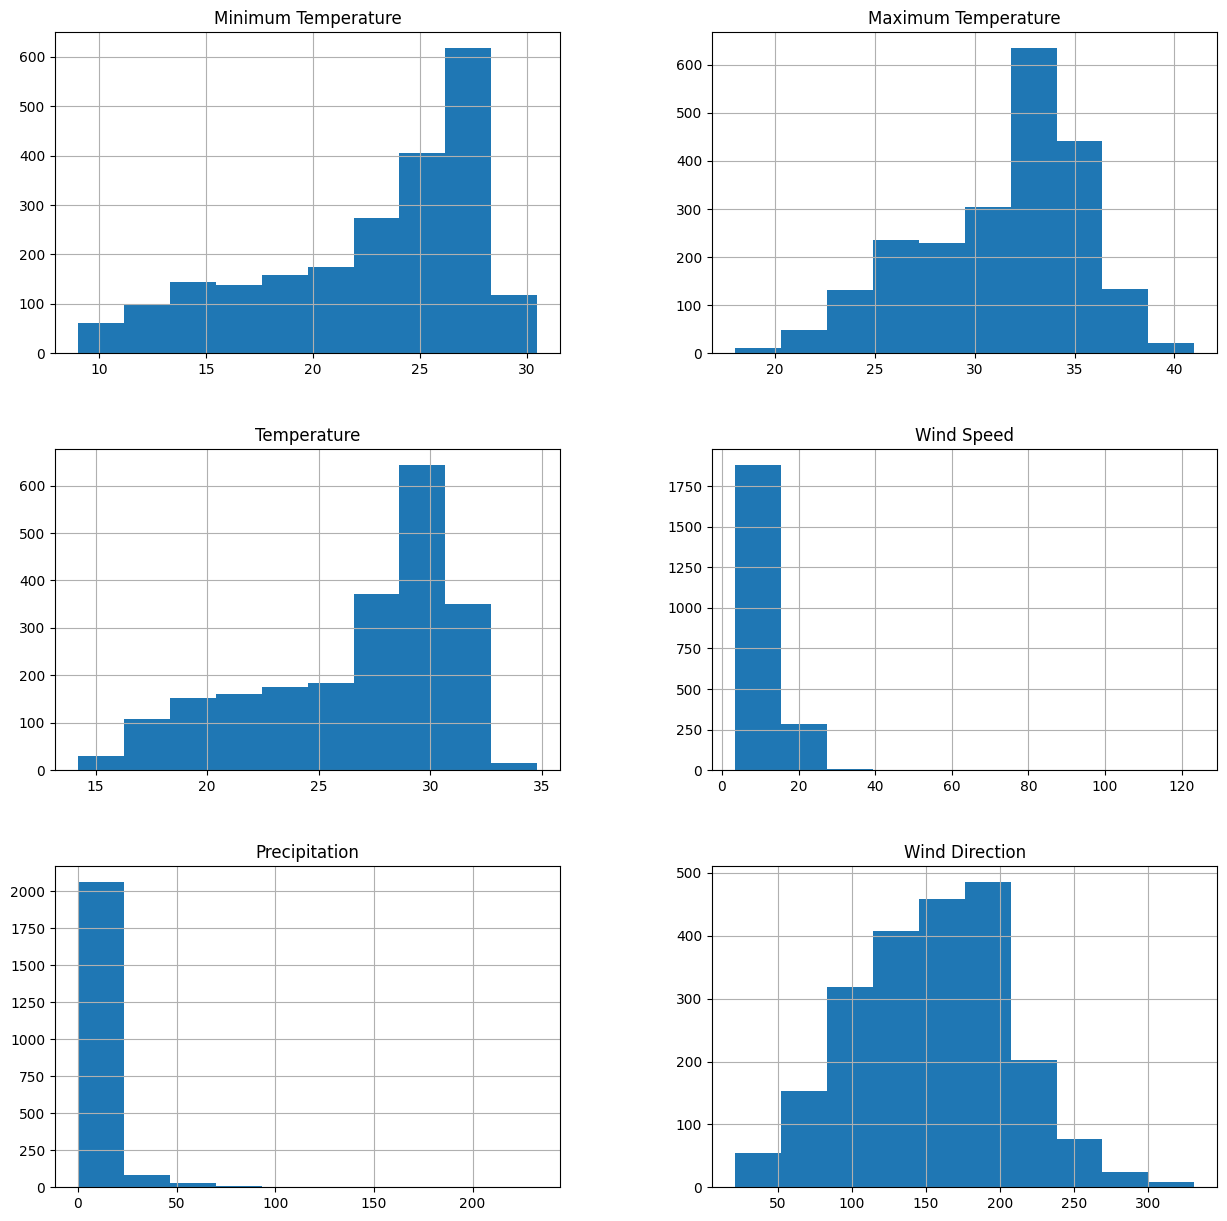

In [15]:
df.hist(bins=10,figsize=(15,15))

We view the distribution of the value variables using the **Histogram**. graph.

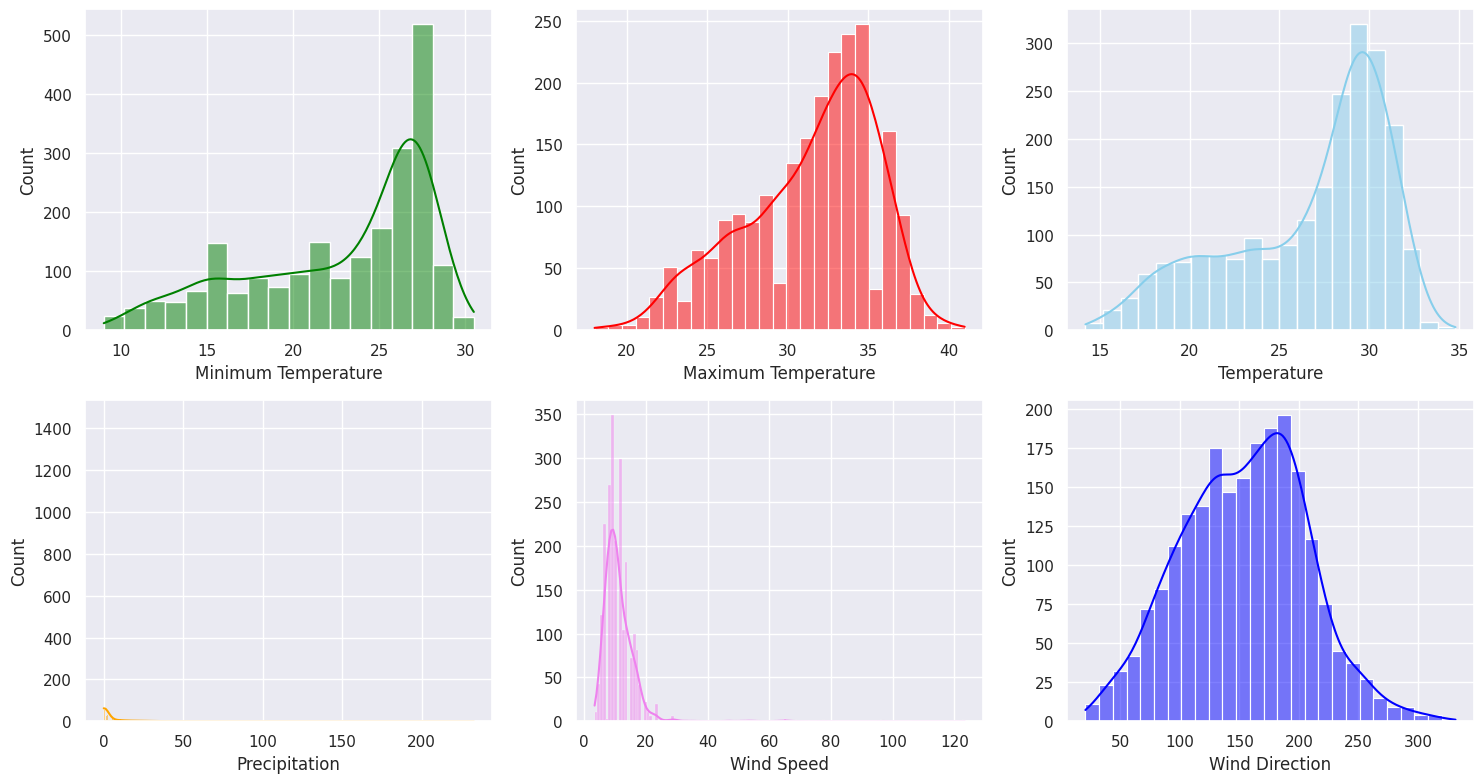

In [16]:
sns.set(style="darkgrid")

# Define the variables and colors for the subplots
variables = ["Minimum Temperature", "Maximum Temperature","Temperature", "Precipitation", "Wind Speed","Wind Direction"]
colors = ["green", "red", "skyblue", "orange","violet","blue"]

# Create the subplots using a loop
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
for i, var in enumerate(variables):
    row=i//3
    col=i%3
    sns.histplot(data=df, x=var, kde=True, ax=axs[row,col], color=colors[i])

plt.tight_layout()
plt.show()

From the graphs above, it is clear that the distribution of precipitation, wind
speed and has positively skewed (right skewed). The right tail is longer than the left tail.
The distribution of minimum tempe has negative skewness (left skewed)
And both have some outliers.

**USING BOXPLOT TO FIND EXTERNAL VALUE AND DIVILITY OF CONDITION VALUES**

<ipython-input-17-2fd309a0d4e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Temperature", y="Weather", data=df, palette="spring", ax=ax)


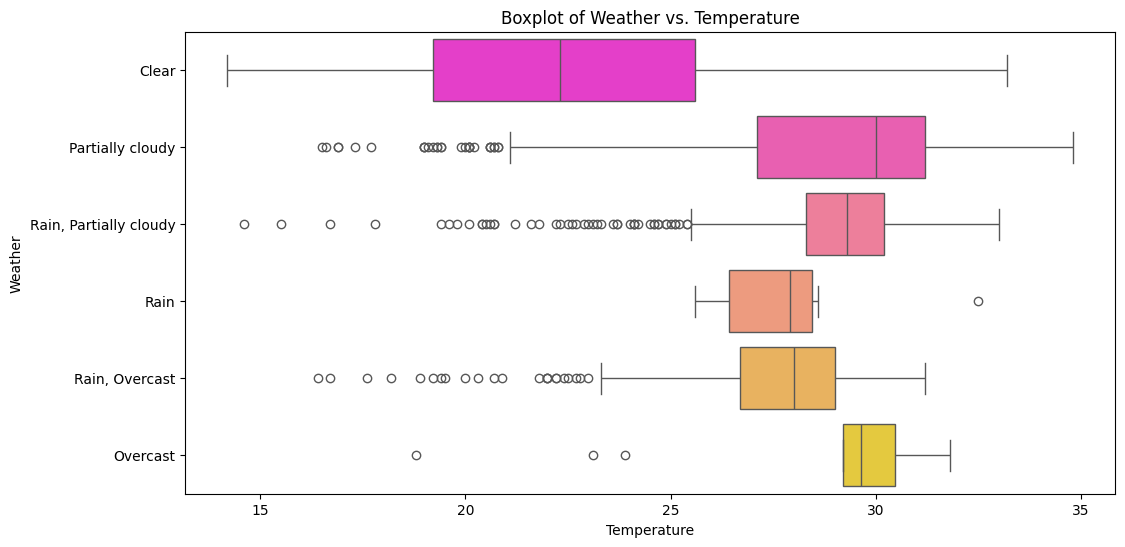

In [17]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="Temperature", y="Weather", data=df, palette="spring", ax=ax)
    ax.set(xlabel='Temperature', ylabel='Weather', title='Boxplot of Weather vs. Temperature')

<ipython-input-18-6b86f621abf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Wind Speed", y="Weather", data=df, palette="spring", ax=ax)


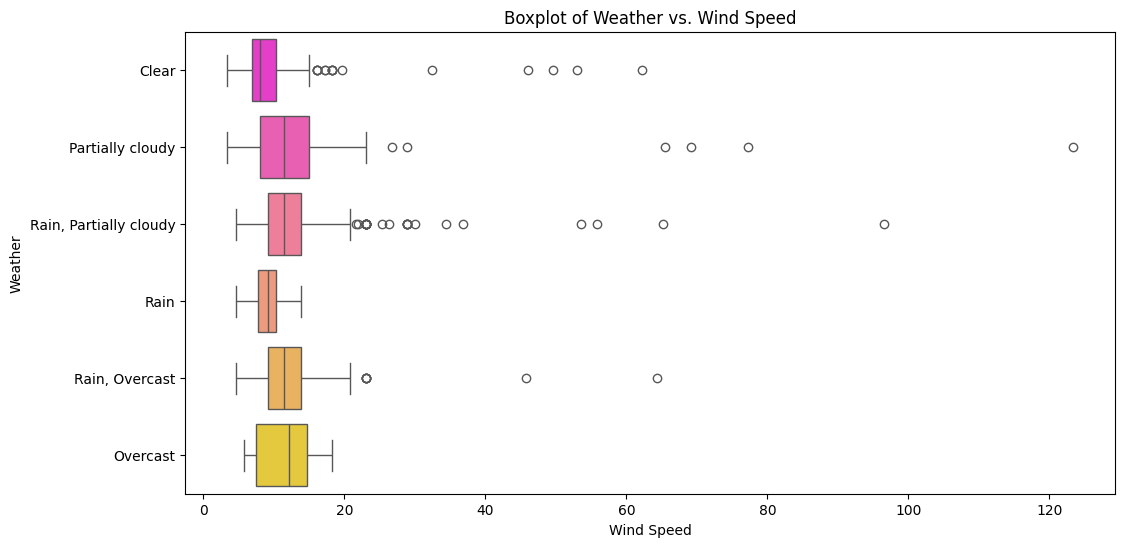

In [18]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="Wind Speed", y="Weather", data=df, palette="spring", ax=ax)
    ax.set(xlabel='Wind Speed', ylabel='Weather', title='Boxplot of Weather vs. Wind Speed')

<ipython-input-19-364e45640e51>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Wind Direction", y="Weather", data=df, palette="spring", ax=ax)


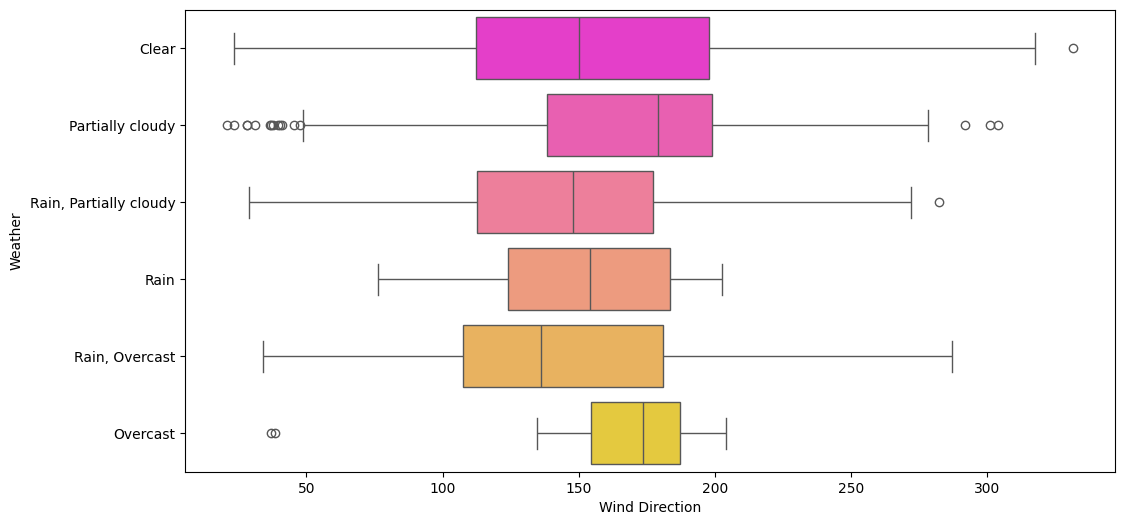

In [19]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="Wind Direction", y="Weather", data=df, palette="spring", ax=ax)

[Text(0.5, 1.0, 'Scatter plot of Wind Speed vs. Temperature')]

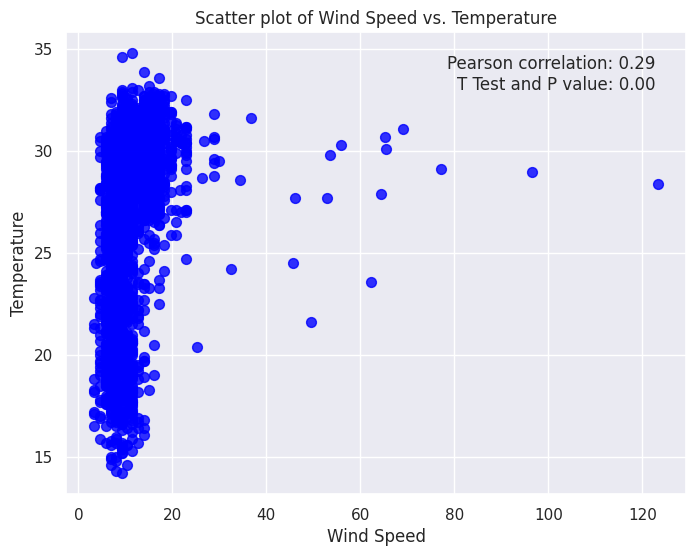

In [20]:
# Create a scatter plot with custom markers and colors, and specify axis object explicitly
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x=df["Wind Speed"], y=df["Temperature"], marker='o', s=50, alpha=0.8, color='blue')

# Calculate Pearson correlation coefficient and p-value
corr, p_value = np.corrcoef(df["Wind Speed"], df["Temperature"])[0, 1], np.mean(np.abs(stats.ttest_ind(df["Wind Speed"], df["Temperature"])[1]))

# Display the correlation and p-value on the plot
ax.text(0.95, 0.95, f"Pearson correlation: {corr:.2f}\nT Test and P value: {p_value:.2f}", transform=ax.transAxes, ha='right', va='top', fontsize=12)

# Add labels to the x and y axis
ax.set(xlabel='Wind Speed', ylabel='Temperature')

# Add a title to the plot
ax.set(title='Scatter plot of Wind Speed vs. Temperature')

[Text(0.5, 1.0, 'Scatter plot of Wind Speed vs. Maximum Temperature')]

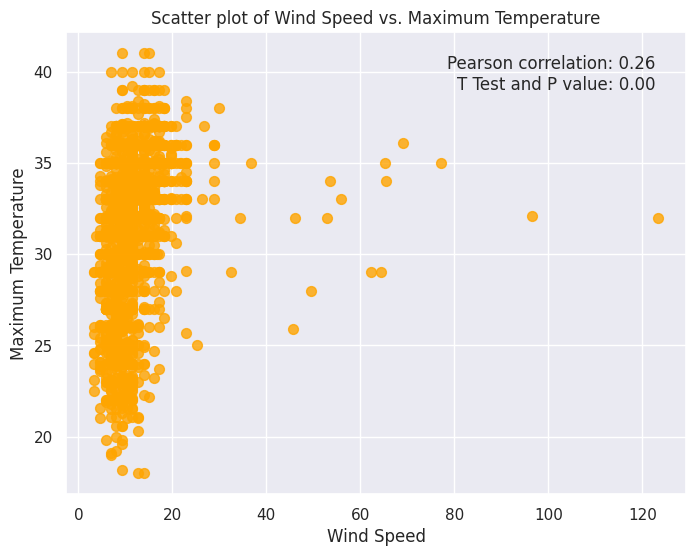

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x=df["Wind Speed"], y=df["Maximum Temperature"], marker='o', s=50, alpha=0.8, color='orange')

# Calculate Pearson correlation coefficient and p-value
corr, p_value = np.corrcoef(df["Wind Speed"], df["Maximum Temperature"])[0, 1], np.mean(np.abs(stats.ttest_ind(df["Wind Speed"], df["Maximum Temperature"])[1]))

# Display the correlation and p-value on the plot
ax.text(0.95, 0.95, f"Pearson correlation: {corr:.2f}\nT Test and P value: {p_value:.2f}", transform=ax.transAxes, ha='right', va='top', fontsize=12)

# Add labels to the x and y axis
ax.set(xlabel='Wind Speed', ylabel='Maximum Temperature')

# Add a title to the plot
ax.set(title='Scatter plot of Wind Speed vs. Maximum Temperature')

[Text(0.5, 1.0, 'Scatter plot of Wind Speed vs. Minimum Temperature')]

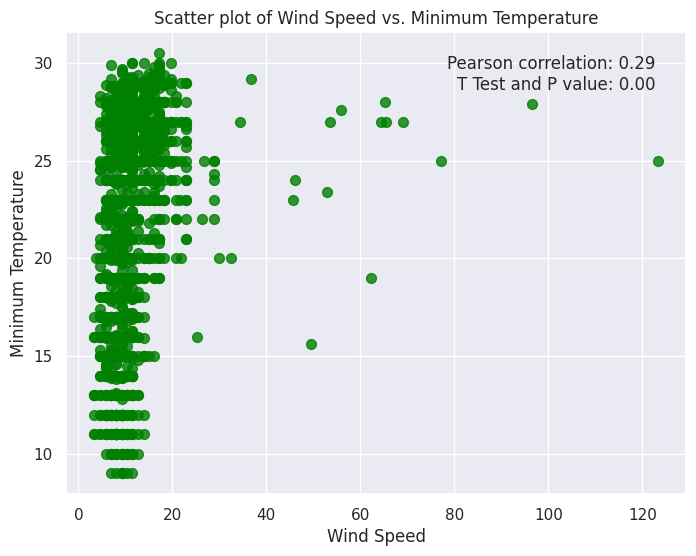

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x=df["Wind Speed"], y=df["Minimum Temperature"], marker='o', s=50, alpha=0.8, color='green')

# Calculate Pearson correlation coefficient and p-value
corr, p_value = np.corrcoef(df["Wind Speed"], df["Minimum Temperature"])[0, 1], np.mean(np.abs(stats.ttest_ind(df["Wind Speed"], df["Minimum Temperature"])[1]))

# Display the correlation and p-value on the plot
ax.text(0.95, 0.95, f"Pearson correlation: {corr:.2f}\nT Test and P value: {p_value:.2f}", transform=ax.transAxes, ha='right', va='top', fontsize=12)

# Add labels to the x and y axis
ax.set(xlabel='Wind Speed', ylabel='Minimum Temperature')

# Add a title to the plot
ax.set(title='Scatter plot of Wind Speed vs. Minimum Temperature')

[Text(0.5, 1.0, 'Scatter plot of Maximum Temperature vs. Minimum Temperature')]

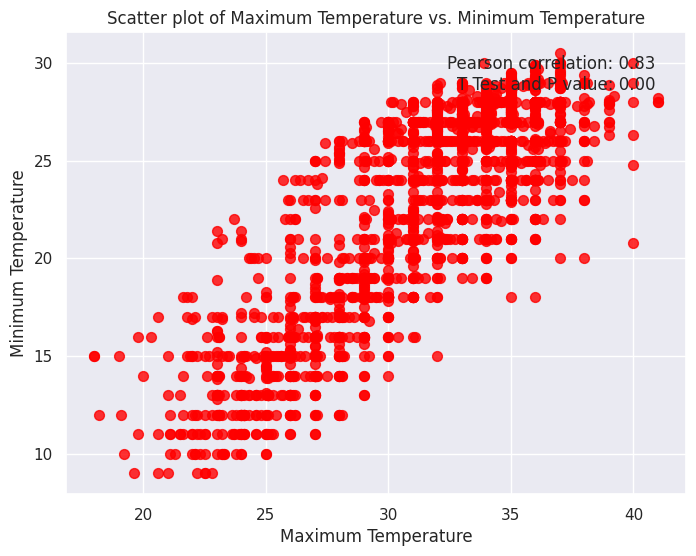

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x=df["Maximum Temperature"], y=df["Minimum Temperature"], marker='o', s=50, alpha=0.8, color='red')

# Calculate Pearson correlation coefficient and p-value
corr, p_value = np.corrcoef(df["Maximum Temperature"], df["Minimum Temperature"])[0, 1], np.mean(np.abs(stats.ttest_ind(df["Maximum Temperature"], df["Minimum Temperature"])[1]))

# Display the correlation and p-value on the plot
ax.text(0.95, 0.95, f"Pearson correlation: {corr:.2f}\nT Test and P value: {p_value:.2f}", transform=ax.transAxes, ha='right', va='top', fontsize=12)

# Add labels to the x and y axis
ax.set(xlabel='Maximum Temperature', ylabel='Minimum Temperature')

# Add a title to the plot
ax.set(title='Scatter plot of Maximum Temperature vs. Minimum Temperature')

**DATA PREPROCESSING AND CLEANING**

In [24]:
missing_values=df.isnull().sum()

In [25]:
print("Missing values:\n",missing_values)

Missing values:
 Date time              0
Minimum Temperature    0
Maximum Temperature    0
Temperature            0
Wind Speed             0
Precipitation          0
Weather Type           1
Wind Direction         0
Weather                0
dtype: int64


In [26]:
df

,Date time,Minimum Temperature,Maximum Temperature,Temperature,Wind Speed,Precipitation,Weather Type,Wind Direction,Weather
0,01/01/2017,14.0,25.3,19.9,5.8,0.0,"Mist, Fog, Smoke Or Haze",78.33,Clear
1,01/02/2017,16.0,26.0,20.6,8.1,0.0,"Mist, Fog, Smoke Or Haze",148.54,Clear
2,01/03/2017,16.0,27.0,21.1,9.2,0.0,"Mist, Smoke Or Haze",244.92,Clear
3,01/04/2017,16.0,25.0,19.9,8.1,0.0,"Mist, Smoke Or Haze",244.38,Clear
4,01/05/2017,15.0,25.6,19.6,8.1,0.0,"Mist, Smoke Or Haze",231.58,Clear
...,...,...,...,...,...,...,...,...,...
2186,12/27/2022,21.8,30.0,24.9,10.3,0.0,"Mist, Sky Coverage Increasing, Smoke Or Haze",174.75,Partially cloudy
2187,12/28/2022,18.3,27.0,22.7,9.2,0.0,"Mist, Fog, Smoke Or Haze",146.13,Clear
2188,12/29/2022,15.0,26.0,20.0,6.9,0.0,"Mist, Smoke Or Haze",122.13,Clear
2189,12/30/2022,14.9,26.0,20.2,5.8,0.0,"Mist, Fog, Smoke Or Haze",131.20,Clear


**Visualizing the dataset**


The variables in the data set we have gathered above will be analyzed in this stage.

First, we will start from the variable weather with the weather classification conditions.

<ipython-input-27-7e3b556d15de>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weather'] = le.fit_transform(df['Weather'])
<ipython-input-27-7e3b556d15de>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='weather', data=df, palette='hls')
<ipython-input-27-7e3b556d15de>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(Weather_names.values()))


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5')]

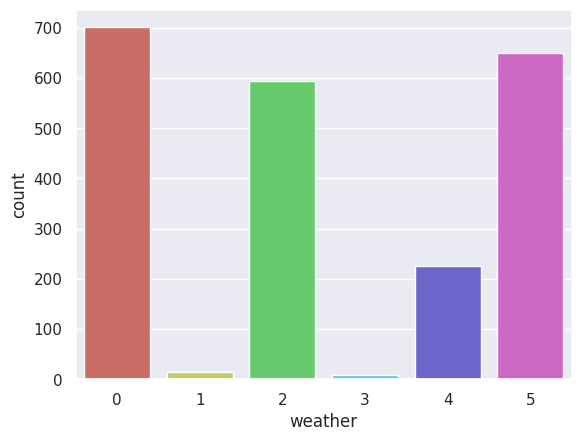

In [27]:
from threading import Condition
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit the encoder to the weather column and transform the values
df['weather'] = le.fit_transform(df['Weather'])

# Create a dictionary that maps the encoded values to the actual names
Weather_names = dict(zip(le.classes_, le.transform(le.classes_)))

# Plot the count of each unique value in the weather column with actual names on the labels
ax=sns.countplot(x='weather', data=df, palette='hls')

ax.set_xticklabels(list(Weather_names.values()))

In [28]:
weather_counts = df['Weather'].value_counts()

# Print the percentage of each unique value in the weather column
for weather, count in weather_counts.items():
    percent = (count / len(df)) * 100
    print(f"Percent of {weather.capitalize()}: {percent:.2f}%")

Percent of Clear: 31.99%
Percent of Rain, partially cloudy: 29.62%
Percent of Partially cloudy: 27.07%
Percent of Rain, overcast: 10.31%
Percent of Overcast: 0.64%
Percent of Rain: 0.37%


In [29]:
df['weather'].value_counts()

,count
weather,
0,701
5,649
2,593
4,226
1,14
3,8


In [30]:
df=df.drop('Weather',axis=1)

In [31]:
le = LabelEncoder()
df['Weather Type'] = le.fit_transform(df['Weather Type'])


**SPLITTING THE DATSET**

In [32]:
x=df.drop(['weather'],axis=1)
y=df['weather']

In [33]:
x

,Date time,Minimum Temperature,Maximum Temperature,Temperature,Wind Speed,Precipitation,Weather Type,Wind Direction
0,01/01/2017,14.0,25.3,19.9,5.8,0.0,174,78.33
1,01/02/2017,16.0,26.0,20.6,8.1,0.0,174,148.54
2,01/03/2017,16.0,27.0,21.1,9.2,0.0,231,244.92
3,01/04/2017,16.0,25.0,19.9,8.1,0.0,231,244.38
4,01/05/2017,15.0,25.6,19.6,8.1,0.0,231,231.58
...,...,...,...,...,...,...,...,...
2186,12/27/2022,21.8,30.0,24.9,10.3,0.0,229,174.75
2187,12/28/2022,18.3,27.0,22.7,9.2,0.0,174,146.13
2188,12/29/2022,15.0,26.0,20.0,6.9,0.0,231,122.13
2189,12/30/2022,14.9,26.0,20.2,5.8,0.0,174,131.20


In [34]:
y.unique()

array([0, 2, 5, 3, 4, 1])

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=25)

In [36]:
x_train.shape

(1752, 8)

In [37]:
x_test.shape

(439, 8)

In [38]:
y_train.shape

(1752,)

In [39]:
y_test.shape

(439,)

In [40]:

from sklearn.preprocessing import StandardScaler

x_train['Date time'] = pd.to_datetime(x_train['Date time'])  # Convert to datetime objects
x_train['Date time'] = x_train['Date time'].astype(int) / 10**9  # Convert to Unix timestamp (numerical)

x_test['Date time'] = pd.to_datetime(x_test['Date time'])  # Do the same for x_test
x_test['Date time'] = x_test['Date time'].astype(int) / 10**9

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**MODEL SELECTION AND TRAINING**

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

Logistic Regression

In [42]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [43]:
lr_acc=lr.score(x_test,y_test)
print("Logistic Regression Accuracy: {:.2f}%".format(lr_acc*100))

Logistic Regression Accuracy: 72.21%


In [44]:
y_pred=lr.predict(x_test)
cf=confusion_matrix(y_test,y_pred)
cf

array([[125,   0,  22,   0,   0],
       [  0,   0,   4,   0,   0],
       [ 21,   0,  89,   1,   8],
       [  0,   0,   1,  25,  20],
       [ 11,   0,  26,   8,  78]])

In [45]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results['Difference'] = results['Actual'] - results['Predicted']
print(results)


      Actual  Predicted  Difference
993        5          5           0
1338       2          2           0
2112       5          5           0
466        5          0           5
1227       2          2           0
...      ...        ...         ...
820        2          2           0
1354       5          5           0
839        2          0           2
1627       4          4           0
1596       2          2           0

[439 rows x 3 columns]


RandomForest Classifier

In [46]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [47]:
rf.score(x_test,y_test)
print("Random Forest Accuracy: {:.2f}%".format(rf.score(x_test,y_test)*100))

Random Forest Accuracy: 84.05%


In [48]:
y_pred=rf.predict(x_test)
cf=confusion_matrix(y_test,y_pred)
cf

array([[133,   0,  14,   0,   0],
       [  0,   0,   4,   0,   0],
       [ 25,   0,  94,   0,   0],
       [  0,   0,   0,  30,  16],
       [  0,   0,   0,  11, 112]])

In [49]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results['Difference'] = results['Actual'] - results['Predicted']
print(results)


      Actual  Predicted  Difference
993        5          5           0
1338       2          2           0
2112       5          4           1
466        5          5           0
1227       2          2           0
...      ...        ...         ...
820        2          2           0
1354       5          5           0
839        2          0           2
1627       4          4           0
1596       2          2           0

[439 rows x 3 columns]


**SUPPORT VECTOR CLASSIFIER**

In [50]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [51]:
svc_score=svc.score(x_test,y_test)

In [52]:
print("SVC accuracy:{:.2f}%".format(svc_score*100))

SVC accuracy:69.02%


In [53]:
y_pred=svc.predict(x_test)
cf=confusion_matrix(y_test,y_pred)
cf

array([[128,   0,  18,   0,   1],
       [  0,   0,   2,   0,   2],
       [ 24,   0,  78,   2,  15],
       [  2,   0,   3,  18,  23],
       [  7,   0,  30,   7,  79]])

In [54]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results['Difference'] = results['Actual'] - results['Predicted']
print(results)

      Actual  Predicted  Difference
993        5          5           0
1338       2          5          -3
2112       5          5           0
466        5          5           0
1227       2          5          -3
...      ...        ...         ...
820        2          5          -3
1354       5          5           0
839        2          2           0
1627       4          4           0
1596       2          2           0

[439 rows x 3 columns]


K-Nearest Neighour

In [55]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [56]:
knn_score=knn.score(x_test,y_test)

In [57]:
print("KNN accuracy:{:.2f}%".format(knn_score*100))

KNN accuracy:65.38%


In [58]:
y_pred=knn.predict(x_test)
cf=confusion_matrix(y_test,y_pred)
cf

array([[129,   0,  16,   0,   2],
       [  0,   0,   3,   0,   1],
       [ 27,   0,  71,   4,  17],
       [  4,   0,   6,  22,  14],
       [ 12,   0,  30,  16,  65]])

In [59]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results['Difference'] = results['Actual'] - results['Predicted']
print(results)

      Actual  Predicted  Difference
993        5          5           0
1338       2          2           0
2112       5          4           1
466        5          5           0
1227       2          2           0
...      ...        ...         ...
820        2          5          -3
1354       5          2           3
839        2          0           2
1627       4          5          -1
1596       2          2           0

[439 rows x 3 columns]


**DECISION TREE CLASSIFIER**

In [60]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [61]:
dt_score=dt.score(x_test,y_test)

In [62]:
print("Decision Tree accuracy:{:.2f}%".format(dt_score*100))

Decision Tree accuracy:75.40%


In [63]:
y_pred=dt.predict(x_test)
cf=confusion_matrix(y_test,y_pred)
cf

array([[125,   0,  22,   0,   0,   0],
       [  0,   0,   4,   0,   0,   0],
       [ 33,   5,  81,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  32,  14],
       [  0,   0,   0,   1,  29,  93]])

In [64]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results['Difference'] = results['Actual'] - results['Predicted']
print(results)

      Actual  Predicted  Difference
993        5          5           0
1338       2          2           0
2112       5          4           1
466        5          5           0
1227       2          2           0
...      ...        ...         ...
820        2          2           0
1354       5          5           0
839        2          2           0
1627       4          4           0
1596       2          2           0

[439 rows x 3 columns]


**EVALUATING MODELS USING r2 score**

In [65]:
from sklearn.metrics import r2_score

# Logistic Regression
y_pred_lr = lr.predict(x_test)
r2_lr = r2_score(y_test, y_pred_lr)
print("Logistic Regression R2 Score: {:.2f}".format(r2_lr))

# Random Forest Classifier
y_pred_rf = rf.predict(x_test)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest R2 Score: {:.2f}".format(r2_rf))

# Support Vector Classifier
y_pred_svc = svc.predict(x_test)
r2_svc = r2_score(y_test, y_pred_svc)
print("SVC R2 Score: {:.2f}".format(r2_svc))

# K-Nearest Neighbors
y_pred_knn = knn.predict(x_test)
r2_knn = r2_score(y_test, y_pred_knn)
print("KNN R2 Score: {:.2f}".format(r2_knn))

# Decision Tree Classifier
y_pred_dt = dt.predict(x_test)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree R2 Score: {:.2f}".format(r2_dt))


Logistic Regression R2 Score: 0.56
Random Forest R2 Score: 0.90
SVC R2 Score: 0.51
KNN R2 Score: 0.40
Decision Tree R2 Score: 0.85


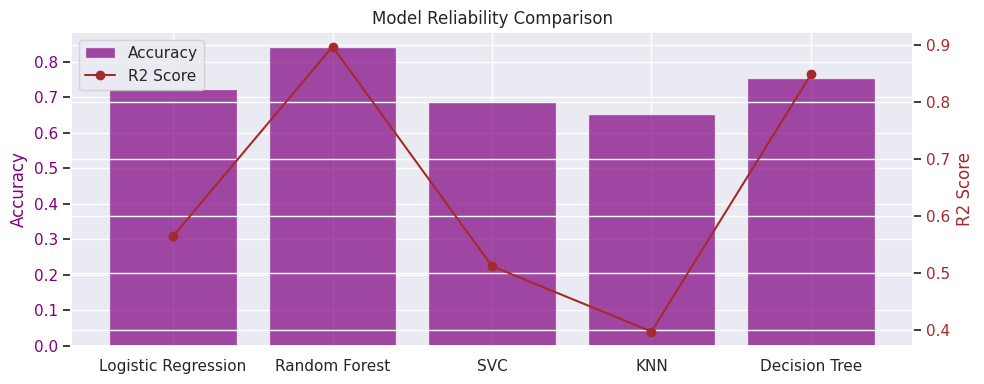

In [66]:
models = ['Logistic Regression', 'Random Forest', 'SVC', 'KNN', 'Decision Tree']
accuracy = [lr_acc, rf.score(x_test, y_test), svc_score, knn_score, dt_score]
r2_scores = [r2_lr, r2_rf, r2_svc, r2_knn, r2_dt]

fig, ax1 = plt.subplots(figsize=(10, 4))

# Accuracy
ax1.bar(models, accuracy, color='purple', alpha=0.7, label='Accuracy')
ax1.set_ylabel('Accuracy', color='purple')
ax1.tick_params('y', labelcolor='purple')

# R2 Score
ax2 = ax1.twinx()
ax2.plot(models, r2_scores, color='brown', marker='o', label='R2 Score')
ax2.set_ylabel('R2 Score', color='brown')
ax2.tick_params('y', labelcolor='brown')

# Add labels and title
plt.title('Model Reliability Comparison')
plt.xticks(rotation=45)
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()


In [67]:
# Create a dictionary of models and their scores
models = {
    'Logistic Regression': {'Accuracy': lr_acc, 'R2': r2_lr},
    'Random Forest': {'Accuracy': rf.score(x_test, y_test), 'R2': r2_rf},
    'SVC': {'Accuracy': svc_score, 'R2': r2_svc},
    'KNN': {'Accuracy': knn_score, 'R2': r2_knn},
    'Decision Tree': {'Accuracy': dt_score, 'R2': r2_dt}
}

# Find the model with the highest accuracy
best_accuracy_model = max(models, key=lambda k: models[k]['Accuracy'])
best_accuracy = models[best_accuracy_model]['Accuracy']

# Find the model with the highest R2 score
best_r2_model = max(models, key=lambda k: models[k]['R2'])
best_r2 = models[best_r2_model]['R2']

# Print the results
print(f"Best Accuracy: {best_accuracy_model} with {best_accuracy:.2f}")
print(f"Best R2 Score: {best_r2_model} with {best_r2:.2f}")

# Select the best model based on a combined score (e.g., average of accuracy and R2)
best_model = max(models, key=lambda k: (models[k]['Accuracy'] + models[k]['R2']) / 2)
print(f"Best Model Overall: {best_model}")


Best Accuracy: Random Forest with 0.84
Best R2 Score: Random Forest with 0.90
Best Model Overall: Random Forest


**Model Testing**

In [68]:
for i in (range(len(y_test))):
    print("----------------------------------")
    pt = rf.predict([x_test[i]])
    if(pt==0):
        print("The predicted weather is: Clear")
    elif(pt==1):
        print("The predicted weather is: Overcast")
    elif(pt==2):
        print("The predicted weather is: Partially Cloudy")
    elif(pt==3):
        print("The predicted weather is: Rain")
    elif(pt==4):
        print("The predicted weather is: Rain and Overcast")
    else:
        print("The predicted weather is: Rain and Partially Cloudy")
    ac = y_test.iloc[i]
    if(ac==0):
        print("The actual weather is: Clear")
    elif(ac==1):
        print("The actual weather is: Overcast")
    elif(ac==2):
        print("The actual weather is: Partially Cloudy")
    elif(ac==3):
        print("The actual weather is: Rain")
    elif(ac==4):
        print("The actual weather is: Rain and Overcast")
    else:
        print("The actual weather is: Rain and Partially Cloudy")

----------------------------------
The predicted weather is: Rain and Partially Cloudy
The actual weather is: Rain and Partially Cloudy
----------------------------------
The predicted weather is: Partially Cloudy
The actual weather is: Partially Cloudy
----------------------------------
The predicted weather is: Rain and Overcast
The actual weather is: Rain and Partially Cloudy
----------------------------------
The predicted weather is: Rain and Partially Cloudy
The actual weather is: Rain and Partially Cloudy
----------------------------------
The predicted weather is: Partially Cloudy
The actual weather is: Partially Cloudy
----------------------------------
The predicted weather is: Clear
The actual weather is: Clear
----------------------------------
The predicted weather is: Clear
The actual weather is: Clear
----------------------------------
The predicted weather is: Partially Cloudy
The actual weather is: Clear
----------------------------------
The predicted weather is: Clea

**Prediction using model**

In [69]:
new_data = [[1672527600, 14.0, 27.0, 20.5, 14.5, 4.2, 3, 135]]
new_data = scaler.transform(new_data)
prediction = rf.predict(new_data)

if prediction[0] == 0:
  print("The predicted weather is: Clear")
elif prediction[0] == 1:
  print("The predicted weather is: Overcast")
elif prediction[0] == 2:
  print("The predicted weather is: Partially Cloudy")
elif prediction[0] == 3:
  print("The predicted weather is: Rain")
elif prediction[0] == 4:
  print("The predicted weather is: Rain and Overcast")
else:
  print("The predicted weather is: Rain and Partially Cloudy")

The predicted weather is: Rain and Overcast


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
